<h1> $\beta_i=1$ plasmas </h1>
<h2> Linear simulations 

In [30]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
fs = 16
mpl.rcParams['font.size'] = fs-2
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-4

In [31]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/bi_unity_mix/'
file, heat, t, Ebperp, Ebpar = {},  {}, {}, {}, {}
file_ind = [1,2]
for i in file_ind:
    file[i] = file_dir + 'lin_upar_{}'.format(str(i)) + '.heat'
    heat[i] = np.loadtxt(file[i])
    t[i], Ebperp[i], Ebpar[i] =heat[i][:, 0], heat[i][:, 2], heat[i][:, 3]
labels = {1:'Alfven $A_0$: {},\n slow $u_0$: {}'.format(r'$\overline{\omega}_0=0.9, DR=0$', 
                                        r'$\overline{\omega}_0=1.1, DR=0$'), 2: 'decay'}

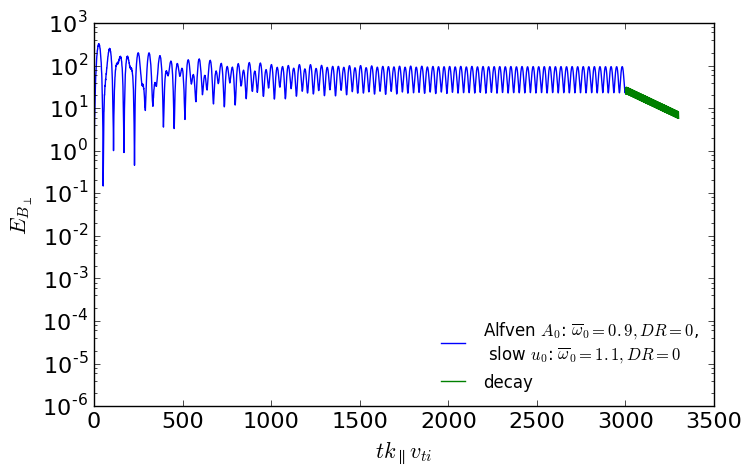

In [36]:
fig_Ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
for i in file_ind:
        ax.plot(t[i], Ebperp[i], label = labels[i])
#         ax.plot(t[i], Ebperp[i], label = labels[i])

ax.set_yscale('log')
ax.legend(loc='best', frameon=False)
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
# fig_Ebperp.savefig('lin_bi_1_mix_Ebperp_1.png', dpi=200)
plt.show()

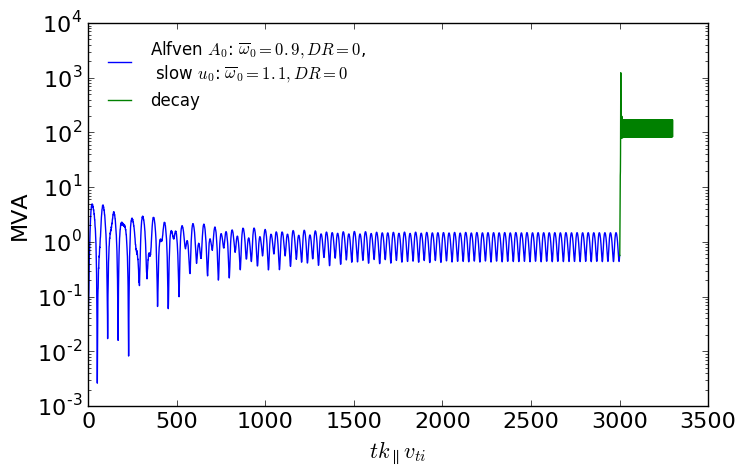

In [37]:
fig_mva, ax = plt.subplots(figsize=(8, 8*0.618))
for i in file_ind:
        ax.plot(t[i][1:], Ebperp[i][1:]/Ebpar[i][1:], label = labels[i])
#         ax.plot(t[i], Ebperp[i], label = labels[i])

ax.set_yscale('log')
ax.legend(loc='best', frameon=False)
ax.set_ylabel('MVA')
ax.set_xlabel('$tk_\parallel v_{ti}$')
# fig_mva.savefig('lin_bi_1_mix_mva_1.png', dpi=200)
plt.show()

In [39]:
# !mv *png figures/

<h2> Nonlinear runs </h2>
- on Cori

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib as mpl
fs = 16
mpl.rcParams['font.size'] = fs-2
mpl.rcParams['axes.labelsize'] = fs
mpl.rcParams['axes.titlesize'] = fs
mpl.rcParams['xtick.labelsize'] = fs
mpl.rcParams['ytick.labelsize'] = fs
mpl.rcParams['legend.fontsize'] = fs-4

<h2> Fitting the linear runs <h2>

In [219]:
file_dir = '/Volumes/yuguang_sd/data/agk/lin_response/bi_unity_collision/k8/'
file, heat, t, Ebperp, Ebpar = {},  {}, {}, {}, {}
file_ind = [1,2]
for i in file_ind:
    file[i] = file_dir + 'lin_upar_{}'.format(str(i)) + '.heat'
    heat[i] = np.loadtxt(file[i])
    t[i], Ebperp[i], Ebpar[i] =heat[i][:, 0], heat[i][:, 2], heat[i][:, 3]
labels = {1:'Alfven $A_0$: {}'.format(r'$\overline{\omega}_0=1., DR=0$'), 2: 'decay'}

In [220]:
kperp, nui, nue = 8., 0.1, 0.5
bi = 1.
wr, wi = 5.7, -0.8
a, off, phi = 1, 0, 0

title = r'$\beta=${0:.1g}, $\nu_i=${1:.1g} and $\nu_e=${2:.1g}, $k_\perp\rho_i=${3:.1g}'.format(1., nui, nue, kperp)

In [221]:
# exponential decay model
def fit_func(t_decay, wi, wr, a, off, phi):
    tbar = t_decay/np.sqrt(bi)
    return np.exp(2*wi*tbar) * (off + a * np.cos(wr*tbar+phi)**2)
# shift time series 
xdata = t[2] - t[2][0]
ydata = Ebperp[2]
mask = xdata < 10
xdata = xdata[mask]
ydata = ydata[mask]
# initial values for fitting
init_val = [wi, wr, a, off, phi]
# nonlinear fit
popt, pcov = curve_fit(fit_func, xdata, ydata, p0=init_val, method='lm')
# fitted parameters
wi_fit, wr_fit = popt[0], popt[1]
# fitted curve
Ebperp_fit = fit_func(xdata, *popt)

fit_label = r'$\overline{\omega}_r=$' + '{0:.3f}, '.format(wr_fit) + '$\overline{\omega}_i=$' + '{0:.2g}'.format(wi_fit)

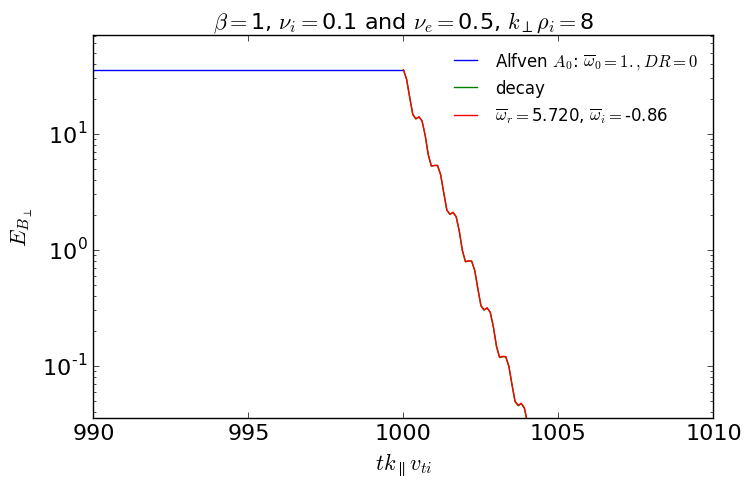

In [225]:
fig_Ebperp, ax = plt.subplots(figsize=(8, 8*0.618))
for i in file_ind:
        ax.plot(t[i], Ebperp[i], label = labels[i])

ax.plot(xdata + t[2][0],  Ebperp_fit, label=fit_label)
ax.set_xlim(t[2][0]-10, t[2][0]+10) 
ax.set_ylim(Ebperp[2][0] * 1e-3, Ebperp[2][0] * 2)
ax.set_yscale('log')
ax.legend(loc='best', frameon=False)
ax.set_ylabel('$E_{B_\perp}$')
ax.set_xlabel('$tk_\parallel v_{ti}$')
ax.set_title(title)
# fig_Ebperp.savefig('lin_bi_1_Alfven_5.png', dpi=200)
plt.show()

In [226]:
!ls *png

lin_bi_1_Alfven_1.png lin_bi_1_Alfven_3.png lin_bi_1_Alfven_5.png
lin_bi_1_Alfven_2.png lin_bi_1_Alfven_4.png


In [227]:
! open *png

In [231]:
!mv *png ../figures/

In [230]:
ls ../figures/

AGK_mva_w0_1.png               lin_bi_1_mix_mva_1.png
AGK_mva_w0_2.png               lin_bi_1_slow_Ebpar_1.png
Ebpar_t_w0_1.png               lin_bi_1_slow_mva_1.png
Ephi_t_w0_1.png                lin_mix_Ebpar_1.png
FL_bpar_t_w0_1.png             lin_mix_Ebperp_1.png
FL_bphi_t_w0_1.png             lin_mix_decay_mva_1.png
agk_apar_cadence.eps           lin_mix_decay_mva_2.png
agk_bpar_cadence.eps           lin_mix_mva_1.png
agk_phi_cadence.eps            lin_slow_bparz_1.eps
bromwich_vs_agk.eps            lin_slow_decay_1.png
bromwich_vs_approx.eps         lin_slow_decay_2.png
fig_bpar_temp_1.eps            lin_slow_decay_3.png
fig_bpar_tf.eps                lin_slow_decay_mva_1.png
fig_bpar_w0.eps                lin_slow_decay_mva_2.png
fig_bpar_w0_2.eps              lin_slow_decay_mva_3.png
fig_phi_temp_1.eps             lin_slow_nz_1.eps
fig_phi_tf.eps                 lin_slow_phi_z_1.eps
fig_phi_w0.eps                 mix_Ebpar_1.png
fig_phi_w0_2.eps               mix_Ebpar_decay_1